## VCB - Vietcombank

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30479.661, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30474.456, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30476.201, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30476.206, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30474.145, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30478.204, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.989 seconds


c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

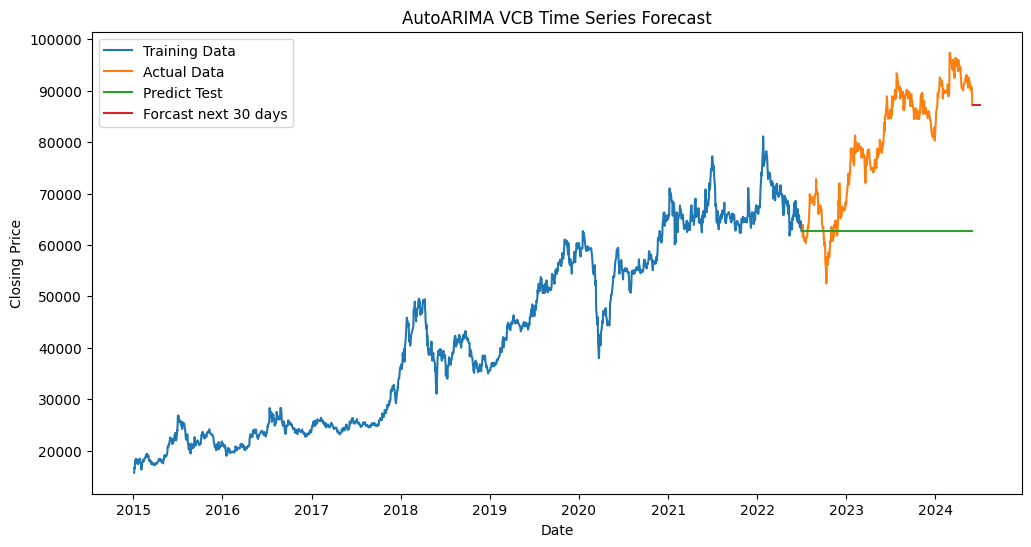

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

# Tải dữ liệu
data = pd.read_csv('../Dataset/VCB.csv')

# Chuyển đổi cột 'Date' thành kiểu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = len(time_series) - train_size

train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
pred_test = model.predict(n_periods=len(test_data))

# Kết hợp dữ liệu huấn luyện và kiểm tra để dự đoán 30 ngày tiếp theo
combined_data = time_series[:train_size + test_size]

# Fit mô hình với dữ liệu kết hợp
model.fit(combined_data)

# Tạo dự đoán cho 30 ngày tiếp theo
last_date = combined_data.index[-1]
next_30_days_index = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30, freq='D')

# Dự đoán giá cho 30 ngày tiếp theo
price_next_30_days = model.predict(n_periods=30)

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
plt.plot(next_30_days_index, price_next_30_days, label='Forcast next 30 days')
plt.title('AutoARIMA VCB Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [13]:
# Tạo DataFrame cho các dự đoán 30 ngày tiếp theo
future_predictions = pd.DataFrame({'Date': next_30_days_index, 'Predicted_Price': price_next_30_days})

# Đặt cột 'Date' làm index
future_predictions.set_index('Date', inplace=True)

# In DataFrame
print(future_predictions)

            Predicted_Price
Date                       
2024-06-01          87200.0
2024-06-02          87200.0
2024-06-03          87200.0
2024-06-04          87200.0
2024-06-05          87200.0
2024-06-06          87200.0
2024-06-07          87200.0
2024-06-08          87200.0
2024-06-09          87200.0
2024-06-10          87200.0
2024-06-11          87200.0
2024-06-12          87200.0
2024-06-13          87200.0
2024-06-14          87200.0
2024-06-15          87200.0
2024-06-16          87200.0
2024-06-17          87200.0
2024-06-18          87200.0
2024-06-19          87200.0
2024-06-20          87200.0
2024-06-21          87200.0
2024-06-22          87200.0
2024-06-23          87200.0
2024-06-24          87200.0
2024-06-25          87200.0
2024-06-26          87200.0
2024-06-27          87200.0
2024-06-28          87200.0
2024-06-29          87200.0
2024-06-30          87200.0


In [14]:
# Tính RMSE, MAPE, và MDA trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mda = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mda

# Tính toán các chỉ số trên tập kiểm tra
rmse, mape, mda = calculate_metrics(test_data, pred_test)

# In ra các chỉ số
print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MDA:', mda)

RMSE: 20251.496340260295
MAPE: 20.631799080712703 %
MDA: 17554.791007278312


## CTG - Viettinbank

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28132.279, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28135.811, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28136.762, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28136.815, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28134.306, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28130.277, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28137.796, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28128.205, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28130.179, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=28137.479, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=28126.739, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28135.336, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=28135.283, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=28128.632, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

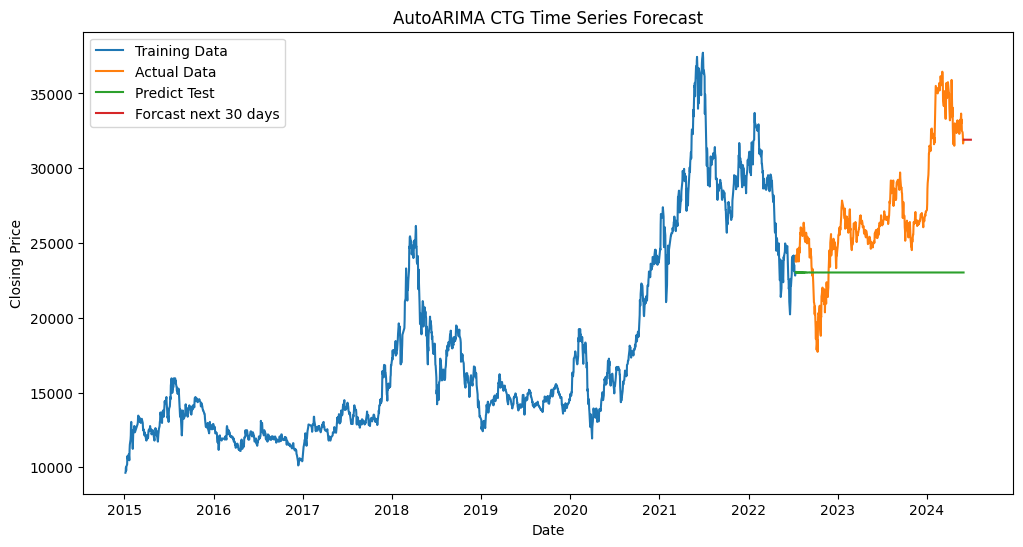

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

# Tải dữ liệu
data = pd.read_csv('../Dataset/CTG.csv')

# Chuyển đổi cột 'Date' thành kiểu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = len(time_series) - train_size

train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
pred_test = model.predict(n_periods=len(test_data))

# Kết hợp dữ liệu huấn luyện và kiểm tra để dự đoán 30 ngày tiếp theo
combined_data = time_series[:train_size + test_size]

# Fit mô hình với dữ liệu kết hợp
model.fit(combined_data)

# Tạo dự đoán cho 30 ngày tiếp theo
last_date = combined_data.index[-1]
next_30_days_index = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30, freq='D')

# Dự đoán giá cho 30 ngày tiếp theo
price_next_30_days = model.predict(n_periods=30)

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
plt.plot(next_30_days_index, price_next_30_days, label='Forcast next 30 days')
plt.title('AutoARIMA CTG Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [16]:
# Tạo DataFrame cho các dự đoán 30 ngày tiếp theo
future_predictions = pd.DataFrame({'Date': next_30_days_index, 'Predicted_Price': price_next_30_days})

# Đặt cột 'Date' làm index
future_predictions.set_index('Date', inplace=True)

# In DataFrame
print(future_predictions)

            Predicted_Price
Date                       
2024-06-01     31903.251114
2024-06-02     31901.430612
2024-06-03     31902.450025
2024-06-04     31901.879192
2024-06-05     31902.198837
2024-06-06     31902.019848
2024-06-07     31902.120075
2024-06-08     31902.063951
2024-06-09     31902.095378
2024-06-10     31902.077781
2024-06-11     31902.087635
2024-06-12     31902.082117
2024-06-13     31902.085207
2024-06-14     31902.083476
2024-06-15     31902.084445
2024-06-16     31902.083903
2024-06-17     31902.084207
2024-06-18     31902.084036
2024-06-19     31902.084132
2024-06-20     31902.084078
2024-06-21     31902.084108
2024-06-22     31902.084091
2024-06-23     31902.084101
2024-06-24     31902.084096
2024-06-25     31902.084099
2024-06-26     31902.084097
2024-06-27     31902.084098
2024-06-28     31902.084097
2024-06-29     31902.084098
2024-06-30     31902.084097


In [17]:
# Tính RMSE, MAPE, và MDA trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mda = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mda

# Tính toán các chỉ số trên tập kiểm tra
rmse, mape, mda = calculate_metrics(test_data, pred_test)

# In ra các chỉ số
print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MDA:', mda)

RMSE: 5582.782004963185
MAPE: 15.463010123181286 %
MDA: 4481.970370165589


## BID - BIDV

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29112.213, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29108.002, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29109.967, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29109.970, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29106.892, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29111.956, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.524 seconds


c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

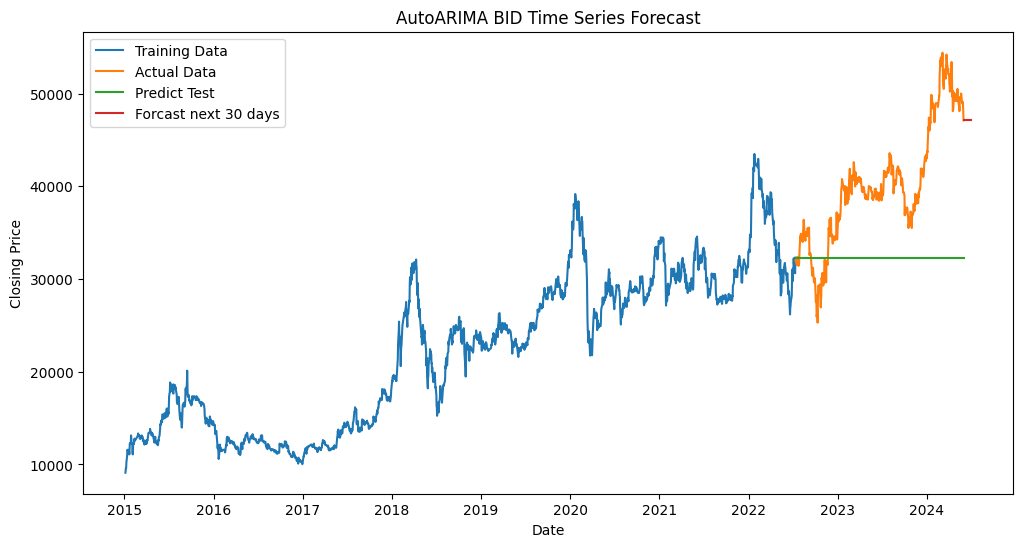

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

# Tải dữ liệu
data = pd.read_csv('../Dataset/BID.csv')

# Chuyển đổi cột 'Date' thành kiểu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = len(time_series) - train_size

train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
pred_test = model.predict(n_periods=len(test_data))

# Kết hợp dữ liệu huấn luyện và kiểm tra để dự đoán 30 ngày tiếp theo
combined_data = time_series[:train_size + test_size]

# Fit mô hình với dữ liệu kết hợp
model.fit(combined_data)

# Tạo dự đoán cho 30 ngày tiếp theo
last_date = combined_data.index[-1]
next_30_days_index = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30, freq='D')

# Dự đoán giá cho 30 ngày tiếp theo
price_next_30_days = model.predict(n_periods=30)

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, pred_test, label='Predict Test')
plt.plot(next_30_days_index, price_next_30_days, label='Forcast next 30 days')
plt.title('AutoARIMA BID Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [19]:
# Tạo DataFrame cho các dự đoán 30 ngày tiếp theo
future_predictions = pd.DataFrame({'Date': next_30_days_index, 'Predicted_Price': price_next_30_days})

# Đặt cột 'Date' làm index
future_predictions.set_index('Date', inplace=True)

# In DataFrame
print(future_predictions)

            Predicted_Price
Date                       
2024-06-01          47100.0
2024-06-02          47100.0
2024-06-03          47100.0
2024-06-04          47100.0
2024-06-05          47100.0
2024-06-06          47100.0
2024-06-07          47100.0
2024-06-08          47100.0
2024-06-09          47100.0
2024-06-10          47100.0
2024-06-11          47100.0
2024-06-12          47100.0
2024-06-13          47100.0
2024-06-14          47100.0
2024-06-15          47100.0
2024-06-16          47100.0
2024-06-17          47100.0
2024-06-18          47100.0
2024-06-19          47100.0
2024-06-20          47100.0
2024-06-21          47100.0
2024-06-22          47100.0
2024-06-23          47100.0
2024-06-24          47100.0
2024-06-25          47100.0
2024-06-26          47100.0
2024-06-27          47100.0
2024-06-28          47100.0
2024-06-29          47100.0
2024-06-30          47100.0


In [20]:
# Tính RMSE, MAPE, và MDA trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mda = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mda

# Tính toán các chỉ số trên tập kiểm tra
rmse, mape, mda = calculate_metrics(test_data, pred_test)

# In ra các chỉ số
print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MDA:', mda)

RMSE: 9970.060569065785
MAPE: 19.102714080878336 %
MDA: 8243.155467084222
